In [ ]:
#import modules
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['superstore.xls']))
df.head()

Saving superstore.xls to superstore (1).xls


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.tail()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   datetime64[ns]
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

In [ ]:
df= df[pd.notnull(df['CustomerID'])]

In [ ]:
filtered_data=df[['Country','CustomerID','Sales','Discount','Profit','Quantity','OrderDate','OrderID']].drop_duplicates()
#필터링 과정에서 드랍할 경우 데이터 손실이 생길 수 있음.
#nunique (pandas) 이용해볼 것, https://stackoverflow.com/questions/15411158/pandas-countdistinct-equivalent

In [ ]:
filtered_data.describe()

,Sales,Discount,Profit,Quantity
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,0.156188,28.660971,3.789753
std,623.276074,0.206457,234.271476,2.225149
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.731000,2.000000
50%,54.480000,0.200000,8.671000,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


In [ ]:
df = df[(df['Quantity']>0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   datetime64[ns]
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

In [ ]:
df=df[['CustomerID','OrderDate','Quantity','Profit','Sales','OrderID']]

In [ ]:
df['OrderDate'].min(),df['OrderDate'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
PRESENT = dt.datetime(2017,12,31)#present check 할 것
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [ ]:
df.head()

,CustomerID,OrderDate,Quantity,Profit,Sales,OrderID
0,CG-12520,2016-11-08,2,41.9136,261.9600,CA-2016-152156
1,CG-12520,2016-11-08,3,219.5820,731.9400,CA-2016-152156
2,DV-13045,2016-06-12,2,6.8714,14.6200,CA-2016-138688
3,SO-20335,2015-10-11,5,-383.0310,957.5775,US-2015-108966
4,SO-20335,2015-10-11,2,2.5164,22.3680,US-2015-108966


In [ ]:
rfm= df.groupby('CustomerID').agg({'Profit': lambda price: price.sum(),
                                        'OrderID': lambda num: len(num),
                                        'OrderDate': lambda date: (PRESENT - date.max()).days})

In [ ]:
rfm.columns

Index(['Profit', 'OrderID', 'OrderDate'], dtype='object')

In [ ]:
#change the names of the columns
rfm.columns=['monetary','frequency','recency']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm.head()


,monetary,frequency,recency
CustomerID,,,
AA-10315,-362.8825,11,185
AA-10375,277.3824,15,20
AA-10480,435.8274,12,260
AA-10645,857.8033,18,56
AB-10015,129.3465,6,416


In [ ]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4','5'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 5, ['5','4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 5, ['5','4','3','2','1'])

In [ ]:
rfm.head()


,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
AA-10315,-362.8825,11,185,4,3,5
AA-10375,277.3824,15,20,1,2,3
AA-10480,435.8274,12,260,5,3,2
AA-10645,857.8033,18,56,3,2,1
AB-10015,129.3465,6,416,5,5,4


In [ ]:

values = ['1','2','3','4','5']
r_dict, f_dict, m_dict = dict(), dict(), dict()

# recency 
for i in values:
  for j in values:
    rfm_c = rfm[(rfm['f_quartile'] == i) & (rfm['m_quartile'] == j)]
    rfm_c_mean = rfm_c['recency'].mean()
    r_dict[(i,j)] = rfm_c_mean

# monetary
for i in values:
  for j in values:
    rfm_c = rfm[(rfm['r_quartile'] == i) & (rfm['f_quartile'] == j)]
    rfm_c_mean = rfm_c['monetary'].mean()
    m_dict[(i,j)] = rfm_c_mean

# frequency 
for i in values:
  for j in values:
    rfm_c = rfm[(rfm['r_quartile'] == i) & (rfm['m_quartile'] == j)]
    rfm_c_mean = rfm_c['frequency'].mean()
    f_dict[(i,j)] = rfm_c_mean

#print(r_dict)

In [ ]:
# recency
r_data = []
for fm in r_dict.keys():
  r_data.append([fm, r_dict[fm]])
# Create the pandas DataFrame
r_df = pd.DataFrame(r_data, columns = ['FM', 'recency value'])
r_df
r_df2 = r_df.copy()
len(r_df2)

r_df2['f_quartile'] = [r_df2.loc[x][0][0] for x in range(25)] 
r_df2['m_quartile'] = [r_df2.loc[x][0][1] for x in range(25)]

r_df2 = r_df2.groupby(['f_quartile','m_quartile']).mean()
r_df2
r_df2 = r_df2.unstack(level=0)
r_df2

recency value                                                
f_quartile             1           2           3           4           5
m_quartile                                                              
1             107.274510   99.583333  152.064516  132.809524  213.125000
2              79.709677   89.071429   96.815789  142.594595  304.300000
3              67.000000  138.093750  141.250000  143.032258  177.606061
4              57.642857   95.666667  155.363636  154.638889  248.126761
5             115.333333   97.500000   87.947368  187.028571  301.857143

In [ ]:
rfm['RFM_Segment'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm['RFM_Score'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
AA-10315,-362.8825,11,185,4,3,5,435,12
AA-10375,277.3824,15,20,1,2,3,123,6
AA-10480,435.8274,12,260,5,3,2,532,10
AA-10645,857.8033,18,56,3,2,1,321,6
AB-10015,129.3465,6,416,5,5,4,554,14


In [ ]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Segment']=='111'].sort_values('monetary', ascending=False).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
SE-20110,2650.6769,19,10,1,1,1,111,3
HM-14860,2437.9836,20,3,1,1,1,111,3
PK-19075,2038.2676,25,10,1,1,1,111,3
DR-12880,1641.8613,24,4,1,1,1,111,3
BF-11170,1538.2127,27,17,1,1,1,111,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Days since last purchase')

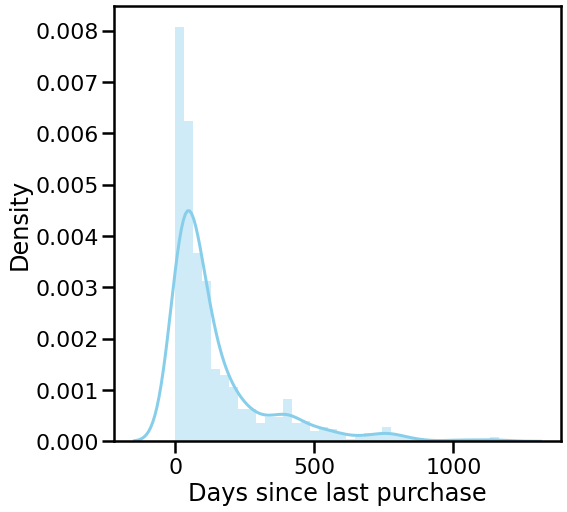

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['skyblue'])
sns.distplot(rfm['recency'])
plt.xlabel('Days since last purchase')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


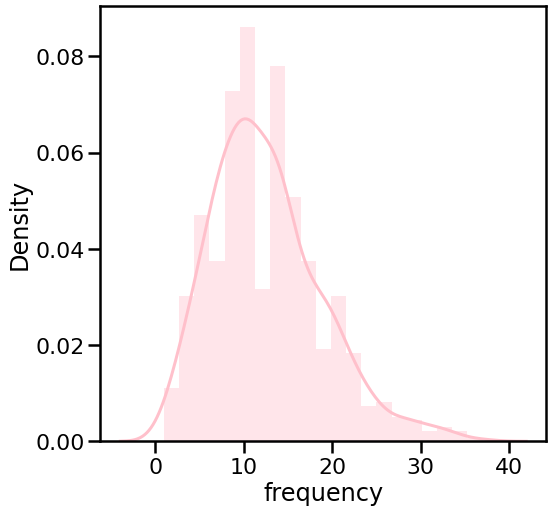

In [ ]:
# Plotting the number of times the customer has made a purchase:

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['pink'])
sns.distplot(rfm['frequency'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Dollars')

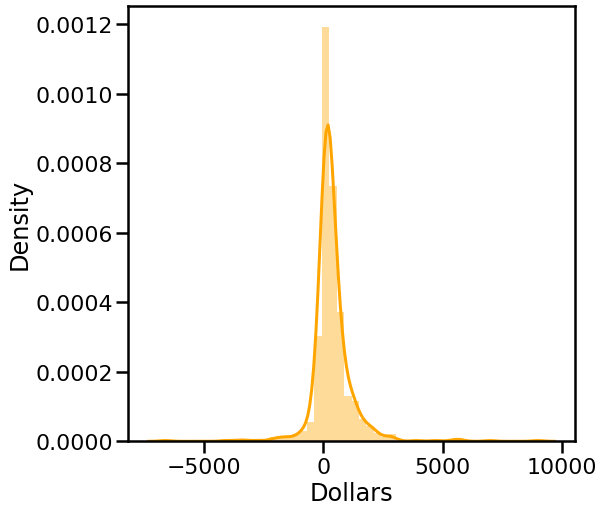

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['orange'])
sns.distplot(rfm['monetary'])
plt.xlabel('Dollars')

In [ ]:
RFM = rfm.copy()

# Importing KMeans and finding clusters:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, init = 'k-means++')

nclusters = km.fit_predict(RFM)

clusters = pd.DataFrame(nclusters, columns = ['clusters'], index = RFM.index)

# Concatenating the clusters with the RFM dataframe:
rfmK= pd.concat([RFM, clusters], axis=1)

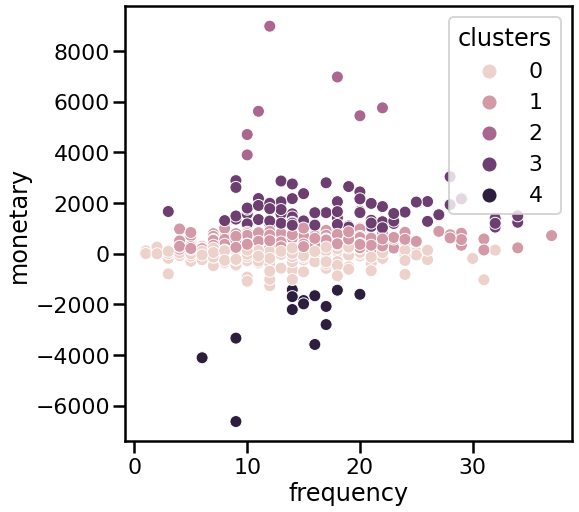

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = rfmK, x='frequency', y='monetary', hue='clusters')


In [ ]:
RFMKMEANS = rfmK.copy()

RFMKMEANS['clusters'] = ['VIPs' if x == 4 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['SuperFans' if x == 3 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['UsualCustomers' if x == 2 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['FrequentCustomers' if x == 0 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['Thrifters' if x == 1 else x for x in RFMKMEANS['clusters']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


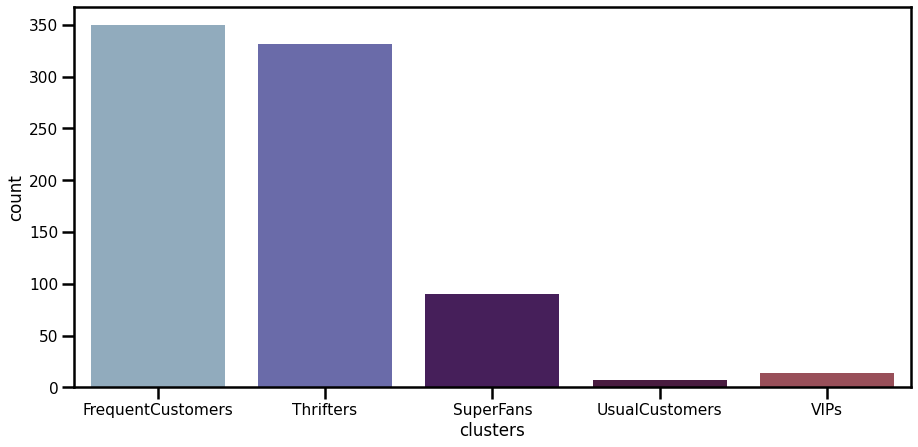

In [ ]:
plt.figure(figsize=(15,7))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(RFMKMEANS['clusters'])

In [ ]:

# calculate averae values for each RFM
rfm_agg = rfm.groupby('RFM_Score').agg({
    'recency' : 'mean',
    'frequency' : 'mean',
    'monetary' : ['mean', 'count']
})
rfm_agg.round(1).head()

recency frequency monetary      
             mean      mean     mean count
RFM_Score                                 
3            15.7      24.8   1397.7    12
4            22.4      19.6   1112.3    37
5            28.4      18.4    806.4    52
6            63.7      17.6    926.0    82
7            81.6      15.9    689.3    78

In [ ]:
# assign labels from total score
score_labels = ['Platinum', 'Gold', 'Silver', 'Member']
score_groups = pd.qcut(rfm.RFM_Score, q = 4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
AA-10315,-362.8825,11,185,4,3,5,435,12,Member
AA-10375,277.3824,15,20,1,2,3,123,6,Platinum
AA-10480,435.8274,12,260,5,3,2,532,10,Silver
AA-10645,857.8033,18,56,3,2,1,321,6,Platinum
AB-10015,129.3465,6,416,5,5,4,554,14,Member


In [ ]:
#K-Means Clustering
# assign labels from total score
score_labels = ['Platinum', 'Gold', 'Silver', 'Member']
score_groups = pd.qcut(rfm.RFM_Score, q = 4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
AA-10315,-362.8825,11,185,4,3,5,435,12,Member
AA-10375,277.3824,15,20,1,2,3,123,6,Platinum
AA-10480,435.8274,12,260,5,3,2,532,10,Silver
AA-10645,857.8033,18,56,3,2,1,321,6,Platinum
AB-10015,129.3465,6,416,5,5,4,554,14,Member


In [ ]:
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x
# apply the function to Recency and MonetaryValue column 
rfm['recency'] = [neg_to_zero(x) for x in rfm.recency]
rfm['monetary'] = [neg_to_zero(x) for x in rfm.monetary]
# unskew the data
rfm_log = rfm[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
# transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)

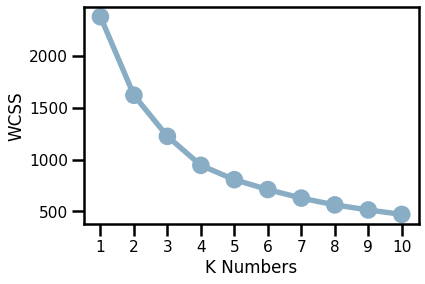

In [ ]:
# the Elbow method
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[k] = kmeans.inertia_
# plot the WSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS') #WSS meansthe sum of distances between the points and the corresponding centroids for each cluster 
plt.show()

In [ ]:
# clustering
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)
# Assign the clusters to datamart
rfm['K_Cluster'] = clus.labels_
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
AA-10315,1.0000,11,185,4,3,5,435,12,Member,2
AA-10375,277.3824,15,20,1,2,3,123,6,Platinum,1
AA-10480,435.8274,12,260,5,3,2,532,10,Silver,0
AA-10645,857.8033,18,56,3,2,1,321,6,Platinum,1
AB-10015,129.3465,6,416,5,5,4,554,14,Member,0


In [ ]:
# assign cluster column 
rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
# melt the dataframe
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'RFM_Level', 'K_Cluster'], var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,AA-10315,Member,2,recency,0.722591
1,AA-10375,Platinum,1,recency,-0.976433
2,AA-10480,Silver,0,recency,0.983098
3,AA-10645,Platinum,1,recency,-0.190328
4,AB-10015,Member,0,recency,1.342155


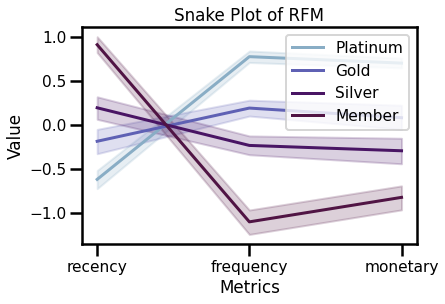

In [ ]:
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')


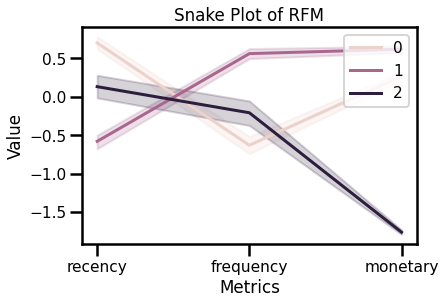

In [ ]:
#ML 확장을 위해 K-Means알고리즘을 사용할 경우의 SnakePlot
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

In [ ]:
#일반적인 RFM 차트 https://etronixx.de/wp-content/uploads/2019/03/RFM_heatmap.png

[]

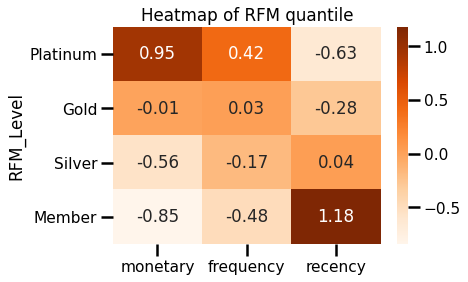

In [ ]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

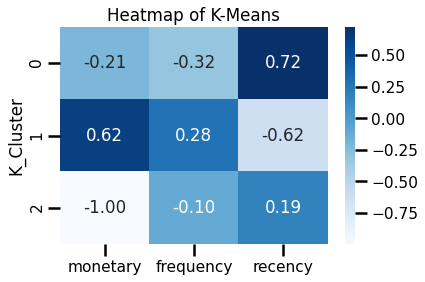

In [ ]:
#ML 확장을 위해 K-Means알고리즘을 사용할 경우의 Heatmap - 대기업전용
# calculate the proportional gap with total mean
cluster_avg_K = rfm.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()